# Analyzing the Impact of Reviews on Airbnb Booking Rates

## Loading the dataset

In [1]:
from google.colab import files
import io
import pandas as pd

# Upload a CSV file
uploaded = files.upload()

# Print the keys of the uploaded dictionary to confirm the filename
print(uploaded.keys())

# Dynamically retrieve the first key from the uploaded dictionary
file_key = next(iter(uploaded))

# Convert the bytes to a file-like object and read it into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_key]))
print(df.head())
df.info()

Saving California_airbnb.csv to California_airbnb.csv
dict_keys(['California_airbnb.csv'])
         Date     id       scrape_id                          name  host_id  \
0  2023-12-10    109  20231203160142         Condo in Culver City       521   
1  2023-12-10   2708  20231203160142   Rental unit in Los Angeles      3008   
2  2023-12-10   2732  20231203160142  Rental unit in Santa Monica      3041   
3  2023-12-10   2864  20231203160142    Rental unit in Bellflower      3207   
4  2023-12-10  63416  20231203160142            Home in Hollywood    309512   

   host_since host_response_time  host_response_rate  host_acceptance_rate  \
0  2008-06-27                NaN                 NaN                  50.0   
1  2008-09-16                NaN                 NaN                 100.0   
2  2008-09-17     within an hour               100.0                  42.0   
3  2008-09-25                NaN                 NaN                   NaN   
4  2010-12-04     within an hour            

## Data Cleaning and Preparation

#### Drop useless columns

In [2]:
# List of useful columns
useful_columns = [
    'price', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_is_superhost', 'instant_bookable', 'room_type',
    'minimum_nights', 'maximum_nights', 'accommodates'
]

# Drop columns that are not needed for analysis
df = df[useful_columns]

# Verify the remaining columns
print(df.columns)
df.head()
df.info()

Index(['price', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'instant_bookable', 'room_type', 'minimum_nights', 'maximum_nights',
       'accommodates'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247859 entries, 0 to 247858
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        245151 non-null  float64
 1   availability_365             247859 non-null  int64  
 2   number_of_reviews            247859 non-null  int64  
 3   number_of_reviews_ltm  

#### Handling Missing Values

In [3]:
# Check for missing values
print(df.isnull().sum())

price                           2708
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating           58260
review_scores_accuracy         58864
review_scores_cleanliness      58863
review_scores_checkin          58888
review_scores_communication    58863
review_scores_location         58892
review_scores_value            58901
reviews_per_month              58305
host_response_time             46073
host_response_rate             46073
host_acceptance_rate           39567
host_is_superhost              21743
instant_bookable                   0
room_type                          0
minimum_nights                     0
maximum_nights                     0
accommodates                       0
dtype: int64


In [4]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if there are any remaining missing values
print(df.isnull().sum())

price                          0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
instant_bookable               0
room_type                      0
minimum_nights                 0
maximum_nights                 0
accommodates                   0
dtype: int64


#### Summary Statistics

In [5]:
# Summary statistics
df.describe()

,price,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_rate,host_acceptance_rate,host_is_superhost,instant_bookable,minimum_nights,maximum_nights,accommodates
count,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000,247859.000000
mean,281.203043,188.647493,41.769510,9.995631,0.791418,4.778886,4.817588,4.772669,4.879034,4.874108,4.815395,4.704749,1.390335,96.702294,90.764076,0.333597,0.278013,16.102578,531.835584,3.970221
std,987.420902,135.757791,85.163162,18.189878,1.609033,0.450181,0.376926,0.401354,0.333371,0.351350,0.342584,0.409405,1.616363,13.415723,19.256059,0.471499,0.448021,30.462415,5696.557617,2.818883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,95.000000,61.000000,1.000000,0.000000,0.000000,4.780000,4.830000,4.760000,4.910000,4.900000,4.810000,4.680000,0.380000,100.000000,93.000000,0.000000,0.000000,2.000000,61.000000,2.000000
50%,150.000000,180.000000,7.000000,2.000000,0.000000,4.890000,4.910000,4.880000,4.960000,4.970000,4.900000,4.790000,0.890000,100.000000,98.000000,0.000000,0.000000,3.000000,365.000000,3.000000
75%,255.000000,330.000000,42.000000,12.000000,1.000000,4.970000,4.980000,4.960000,5.000000,5.000000,4.980000,4.880000,1.770000,100.000000,100.000000,1.000000,1.000000,30.000000,1125.000000,5.000000
max,99999.000000,365.000000,2472.000000,941.000000,71.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.460000,100.000000,100.000000,1.000000,1.000000,1125.000000,999999.000000,16.000000


#### Check unique values for categorical columns

In [6]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in 'host_response_time':
['within an hour' 'within a few hours' 'within a day' 'a few days or more']


Unique values in 'room_type':
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']




In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print the number of unique values for each categorical column
for col in categorical_cols:
    print(f"Number of unique values in '{col}': {df[col].nunique()}")

Number of unique values in 'host_response_time': 4
Number of unique values in 'room_type': 4


### Create new feature

Define Book Rates

In [8]:
# Calculate booked days for the year
df['booked_days_365'] = 365 - df['availability_365']

# Calculate booking rate for the year
df['booking_rate'] = df['booked_days_365'] / 365

# Display the first few rows to verify
print(df[['availability_365', 'booked_days_365', 'booking_rate']].head())


   availability_365  booked_days_365  booking_rate
0               180              185      0.506849
1               271               94      0.257534
2               360                5      0.013699
3                 0              365      1.000000
4                 0              365      1.000000


## Exploratory Data Analysis

#### Checking for outliers and Distribution of features

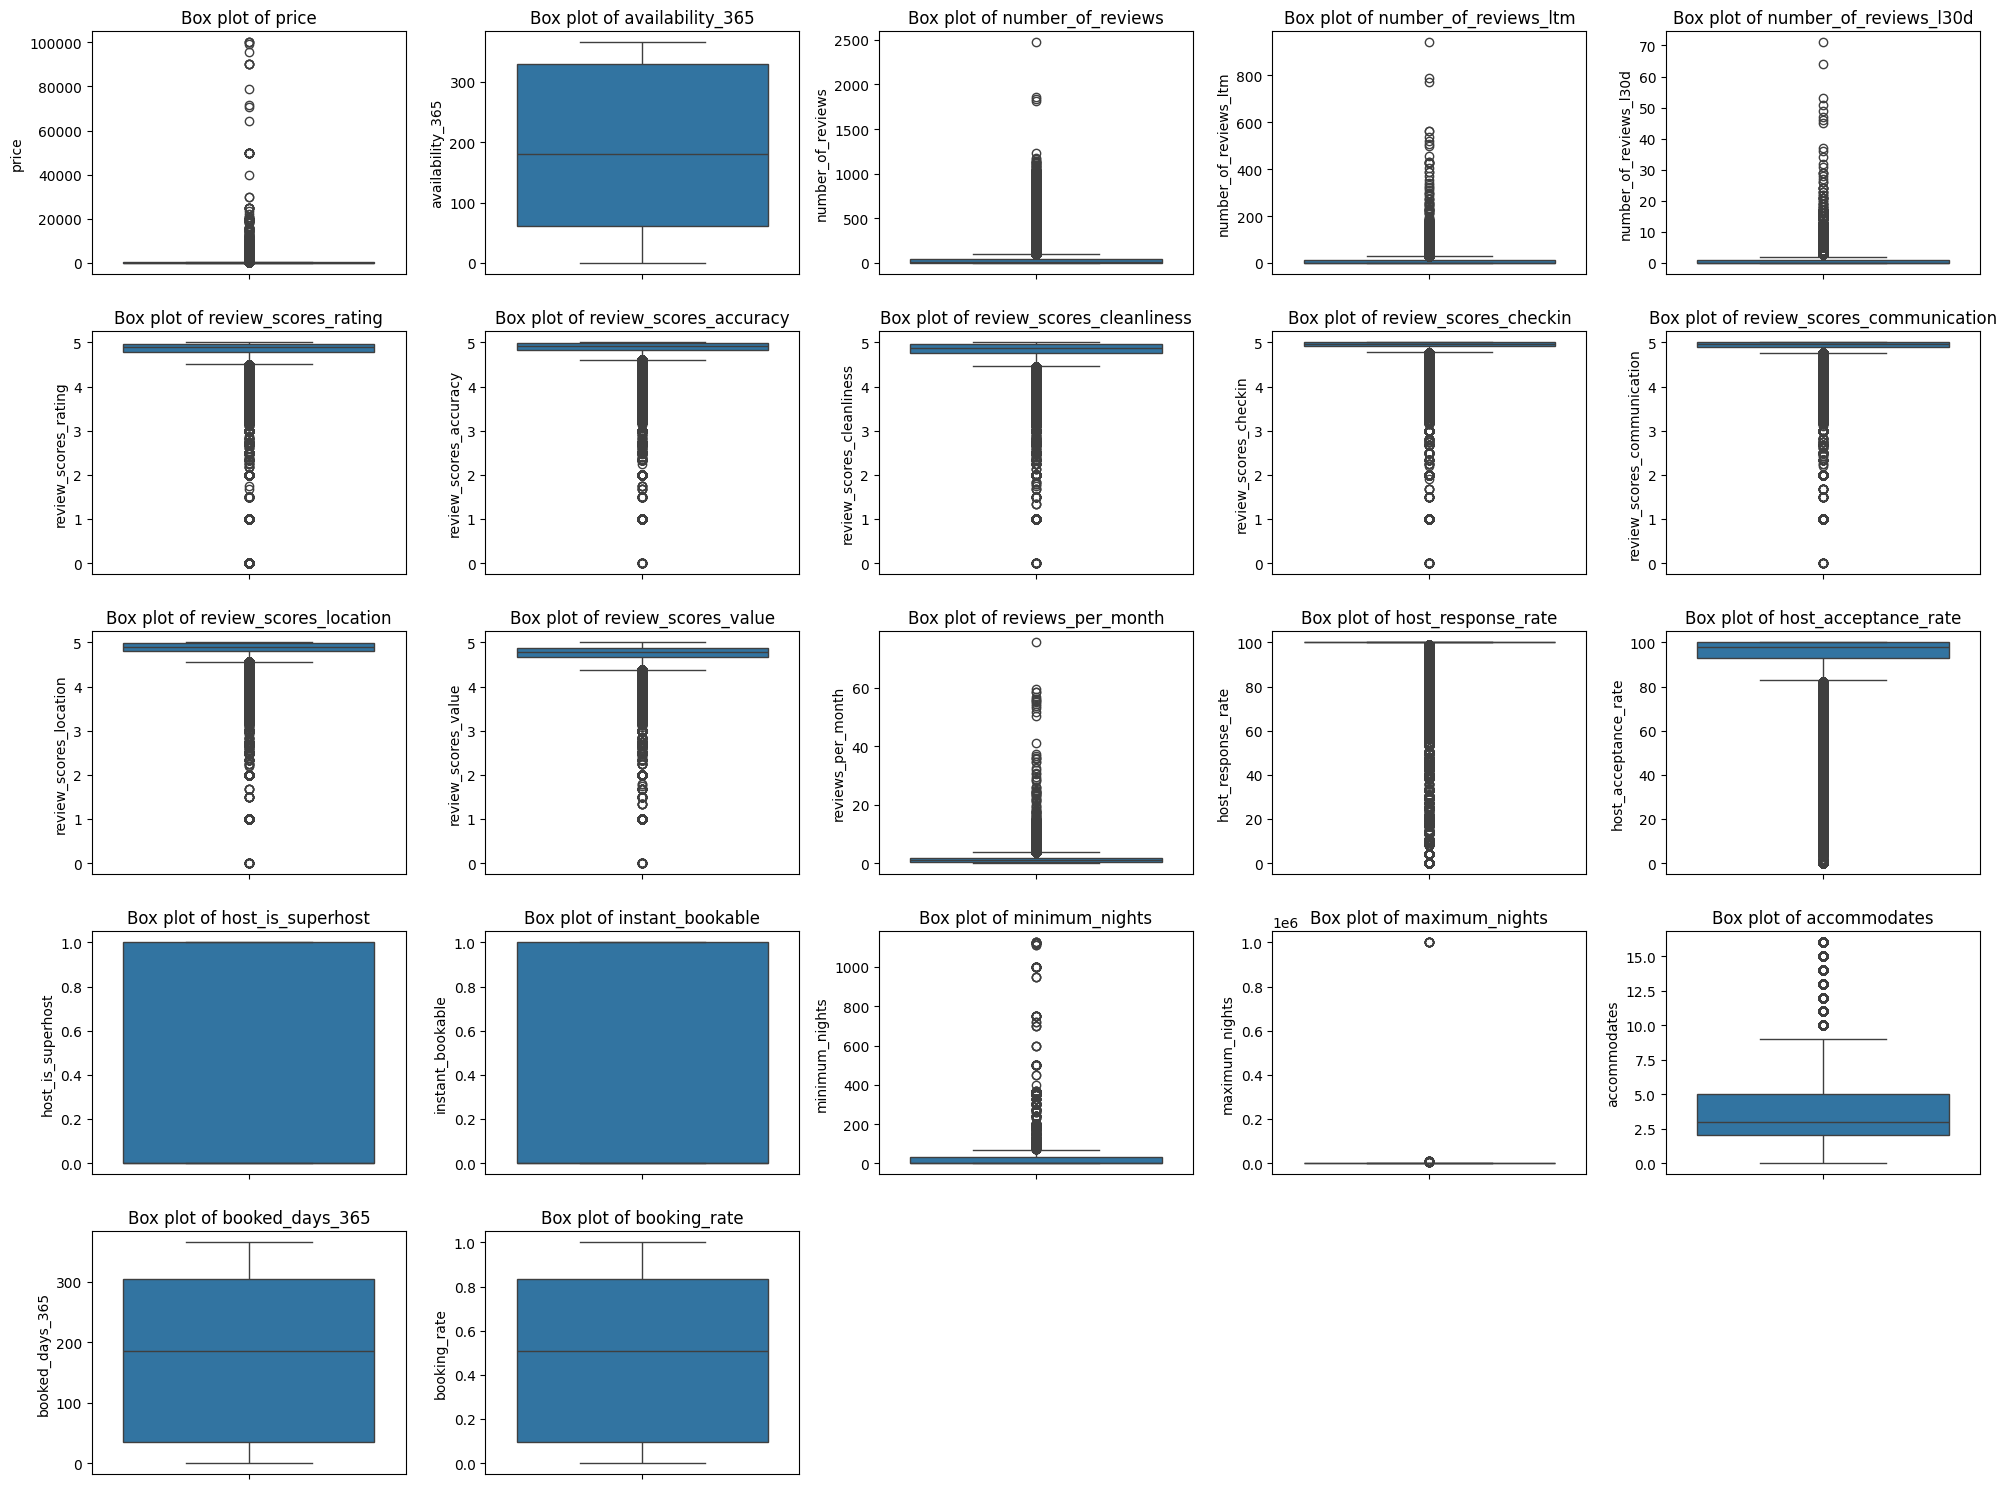

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting box plots for each numerical feature in the dataframe
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


#### Handling Outliers

In [10]:
import numpy as np

# Remove rows with review scores of 0
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for col in review_score_columns:
    df = df[df[col] != 0]

# Set thresholds for 'minimum_nights' and 'maximum_nights'
min_nights_threshold = 30  # Example threshold for minimum nights (1 month)
max_nights_threshold = 365  # Example threshold for maximum nights (1 year)

# Cap 'minimum_nights' and 'maximum_nights' at the thresholds
df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_threshold, min_nights_threshold, df['minimum_nights'])
df['maximum_nights'] = np.where(df['maximum_nights'] > max_nights_threshold, max_nights_threshold, df['maximum_nights'])

# Verify the changes
print("Minimum nights description after capping:\n", df['minimum_nights'].describe())
print("Maximum nights description after capping:\n", df['maximum_nights'].describe())

# Check the shape of the data to ensure rows with review scores of 0 are removed
print("Data shape after handling outliers:", df.shape)


Minimum nights description after capping:
 count    247302.000000
mean         13.750827
std          13.647969
min           1.000000
25%           2.000000
50%           3.000000
75%          30.000000
max          30.000000
Name: minimum_nights, dtype: float64
Maximum nights description after capping:
 count    247302.000000
mean        252.731470
std         150.643351
min           1.000000
25%          61.000000
50%         365.000000
75%         365.000000
max         365.000000
Name: maximum_nights, dtype: float64
Data shape after handling outliers: (247302, 24)


#### Relationship Between the number of reviews and booking rates


Maximum number of reviews: 2472
   number_of_reviews review_bins
0                  2        0-10
1                 40       11-50
2                 24       11-50
3                  0        0-10
4                161     101-200


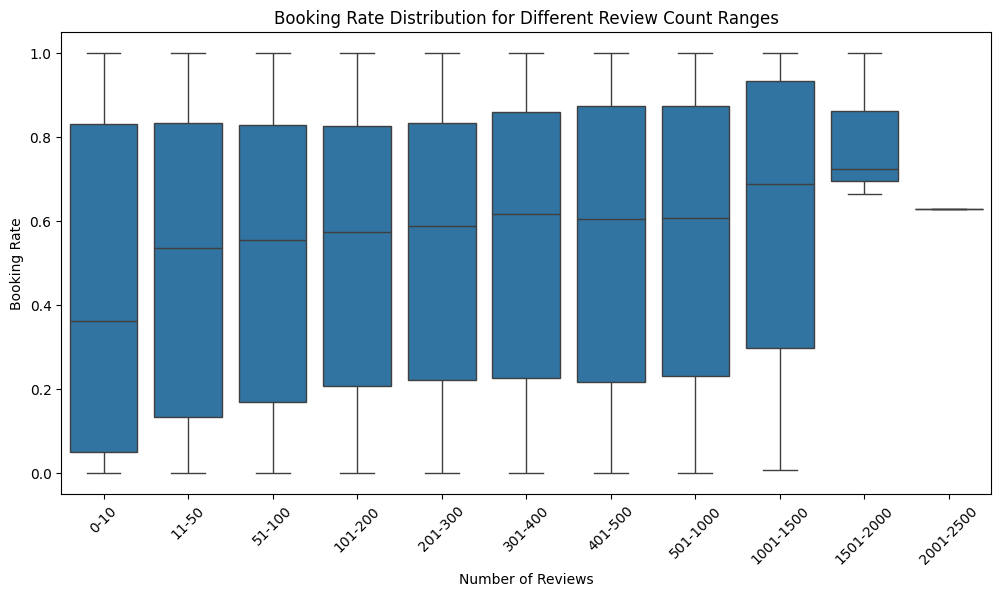

In [11]:

# Verify the maximum value of number_of_reviews
max_reviews = df['number_of_reviews'].max()
print(f"Maximum number of reviews: {max_reviews}")

# Create bins for the number of reviews, ensuring bins are strictly increasing
bins = [0, 10, 50, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500]
labels = ['0-10', '11-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']
df['review_bins'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels, right=False)

# Verify the bins were created correctly
print(df[['number_of_reviews', 'review_bins']].head())

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_bins', y='booking_rate', data=df)
plt.title('Booking Rate Distribution for Different Review Count Ranges')
plt.xlabel('Number of Reviews')
plt.ylabel('Booking Rate')
plt.xticks(rotation=45)
plt.show()

Interpretation

1.The wide IQR across most bins indicates that the booking rate varies significantly for listings, regardless of the number of reviews. This suggests that the number of reviews alone is not a strong determinant of the booking rate.

2.The relatively consistent median booking rates across bins indicate that on average, the number of reviews does not drastically change the booking rate.

#### Relationship between review scores and Booking Rates.

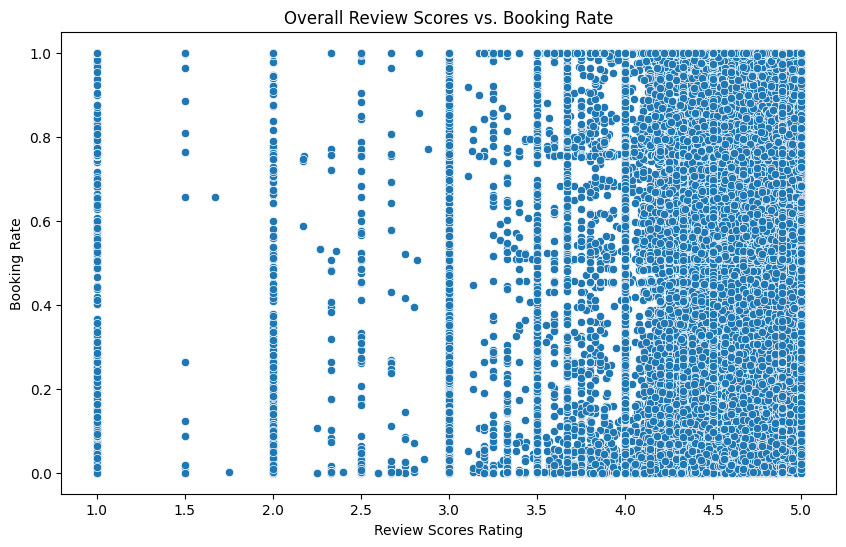

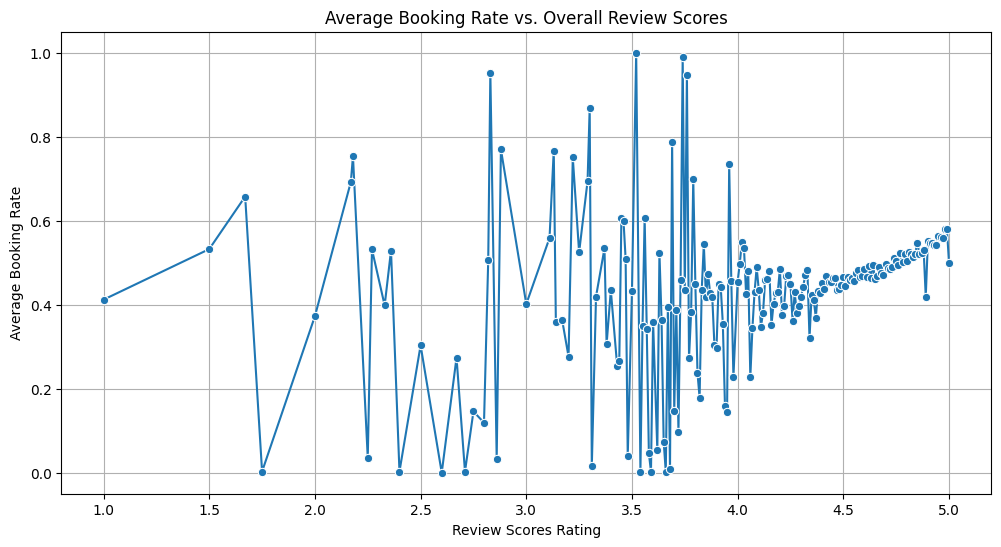

In [12]:
# Scatter plot for overall review scores vs booking rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='booking_rate', data=df)
plt.title('Overall Review Scores vs. Booking Rate')
plt.xlabel('Review Scores Rating')
plt.ylabel('Booking Rate')
plt.show()


# Group by overall review scores and calculate the average booking rate
avg_booking_rate = df.groupby('review_scores_rating')['booking_rate'].mean().reset_index()

# Line plot for overall review scores vs average booking rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_scores_rating', y='booking_rate', data=avg_booking_rate, marker='o')
plt.title('Average Booking Rate vs. Overall Review Scores')
plt.xlabel('Review Scores Rating')
plt.ylabel('Average Booking Rate')
plt.grid(True)
plt.show()


Interpretation

1. The overall review scores have a substantial impact on booking rates for Airbnb listings. Higher review scores (4 to 5) are associated with higher booking rates.
2. However, the variability in booking rates across all review scores suggests that other factors also play a significant role in influencing booking rates.

#### key factors in reviews that contribute to higher booking rates?
Individual Review Scores vs booking rate

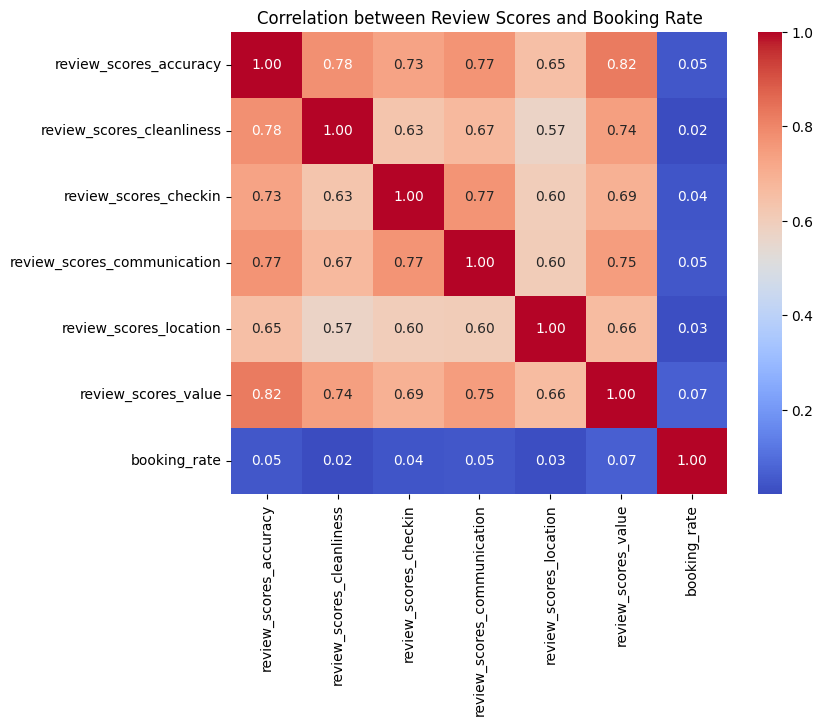

In [13]:
# Scatter plots for individual review scores vs booking rate
review_score_columns = [
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]


# Correlation heatmap to show the relationship between review scores and booking rate
plt.figure(figsize=(8, 6))
corr_matrix = df[review_score_columns + ['booking_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Review Scores and Booking Rate')
plt.show()



Interpretation


The heatmap shows very weak correlations between individual review scores and booking rates (e.g., 0.07 for review_scores_value).

This suggests that individual review aspects (accuracy, cleanliness, check-in, communication, location, value) do not strongly predict booking rates when considered in isolation.


## Feature Engineering

Drop the review_bin column

In [14]:
# Drop the 'review_bins' column
df = df.drop('review_bins', axis=1)

One-hot Encoding

In [15]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['room_type', 'host_response_time'], drop_first=True)

# Display the first few rows to verify
print(df.head())
print(df.info())


   price  availability_365  number_of_reviews  number_of_reviews_ltm  \
0  129.0               180                  2                      0   
1   94.0               271                 40                      2   
2  179.0               360                 24                      0   
3   50.0                 0                  0                      0   
4  220.0                 0                161                     23   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       0                  4.00                    5.00   
1                       0                  4.85                    4.80   
2                       0                  4.41                    4.26   
3                       0                  4.89                    4.91   
4                       1                  4.99                    4.92   

   review_scores_cleanliness  review_scores_checkin  \
0                       5.00                   3.00   
1     

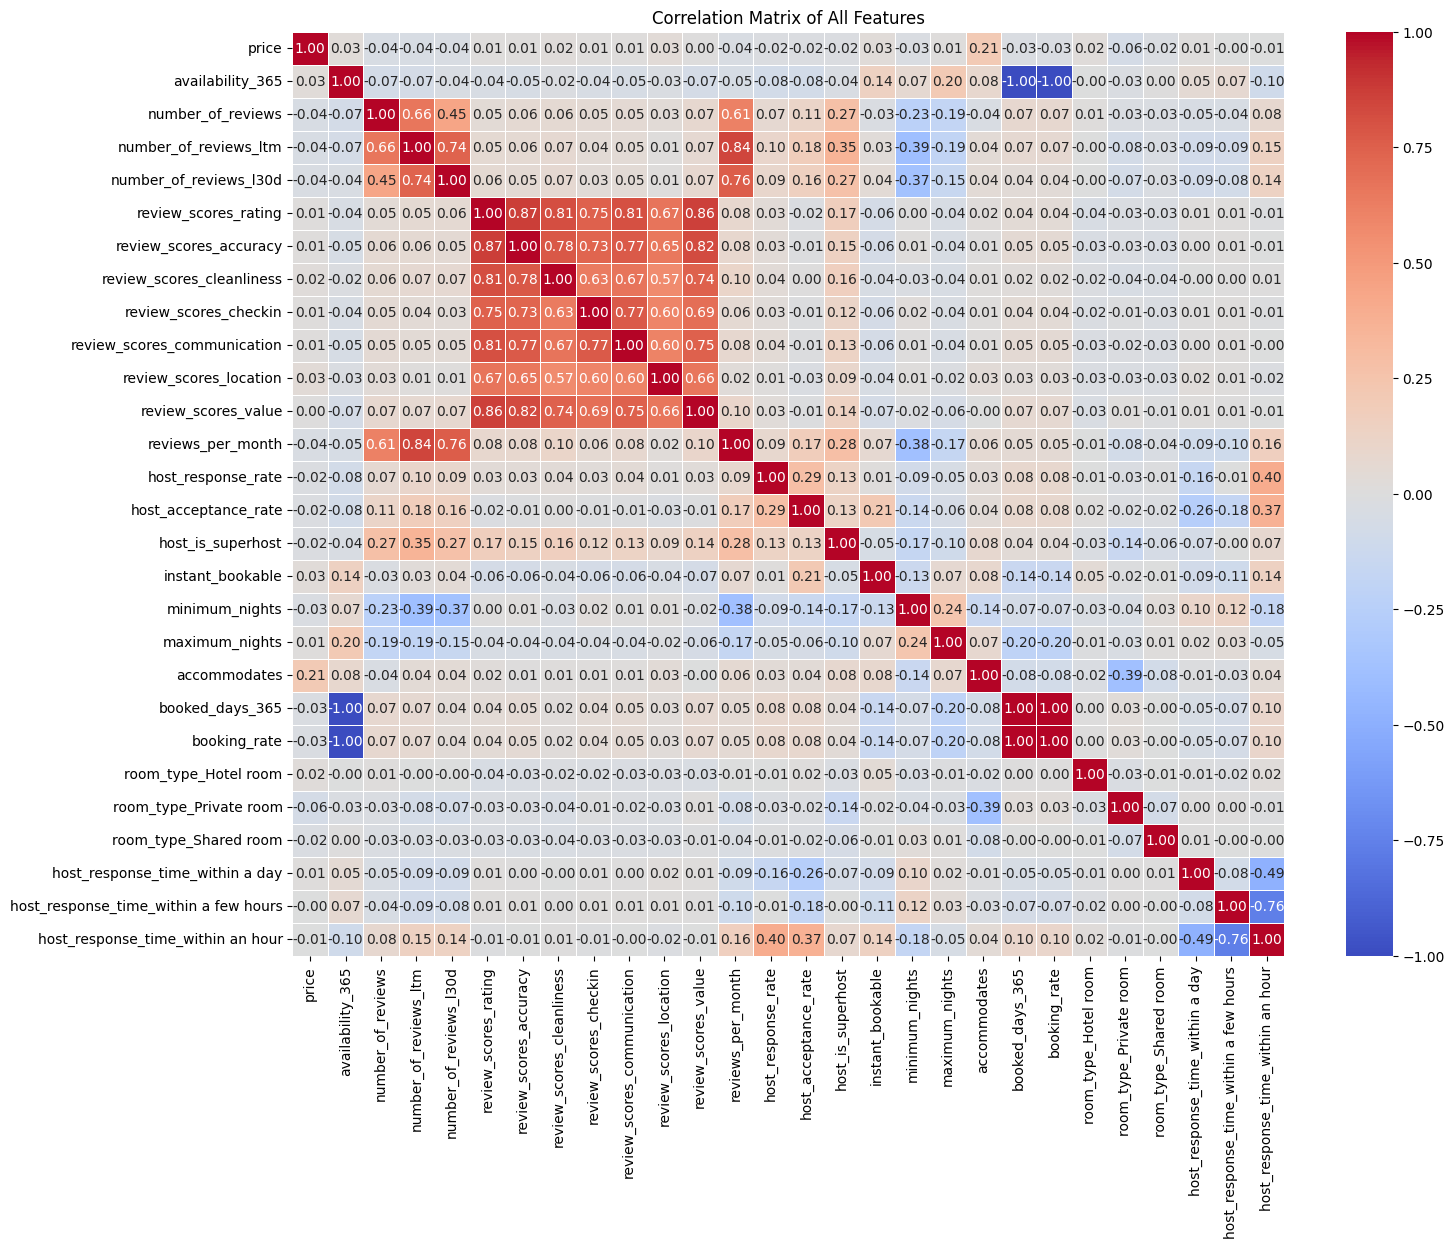

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()


Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns excluding the target variable 'booking_rate'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('booking_rate')

# Normalize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows to verify normalization
print(df.head())



      price  availability_365  number_of_reviews  number_of_reviews_ltm  \
0 -0.154184         -0.066025          -0.467646              -0.550323   
1 -0.189597          0.604862          -0.021831              -0.440458   
2 -0.103594          1.261005          -0.209543              -0.550323   
3 -0.234116         -1.393056          -0.491110              -0.550323   
4 -0.062110         -1.393056           1.397739               0.713127   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0               -0.492548             -2.015370                0.486371   
1               -0.492548              0.155074               -0.047562   
2               -0.492548             -0.968450               -1.489183   
3               -0.492548              0.257213                0.246101   
4                0.128415              0.512559                0.272798   

   review_scores_cleanliness  review_scores_checkin  \
0                   0.568926              -

## Model Building and Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(['booking_rate'], axis=1)
y = df['booking_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2.733634179936952e-30
R^2 Score: 1.0


Result:

This result indicates that the model is overfitting

#### Checking for Feature Names and shape of Training data

In [19]:
print("Feature Names:", X.columns.tolist())
print("Shape of Training Data:", X_train.shape)

Feature Names: ['availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'instant_bookable', 'minimum_nights', 'maximum_nights', 'accommodates', 'booked_days_365', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour']
Shape of Training Data: (173111, 26)


#### Redo the Random Forest Model dropping the availability_365 and booked_days_365 features

Mean Squared Error: 0.07779803799834155
R^2 Score: 0.4356080943532512


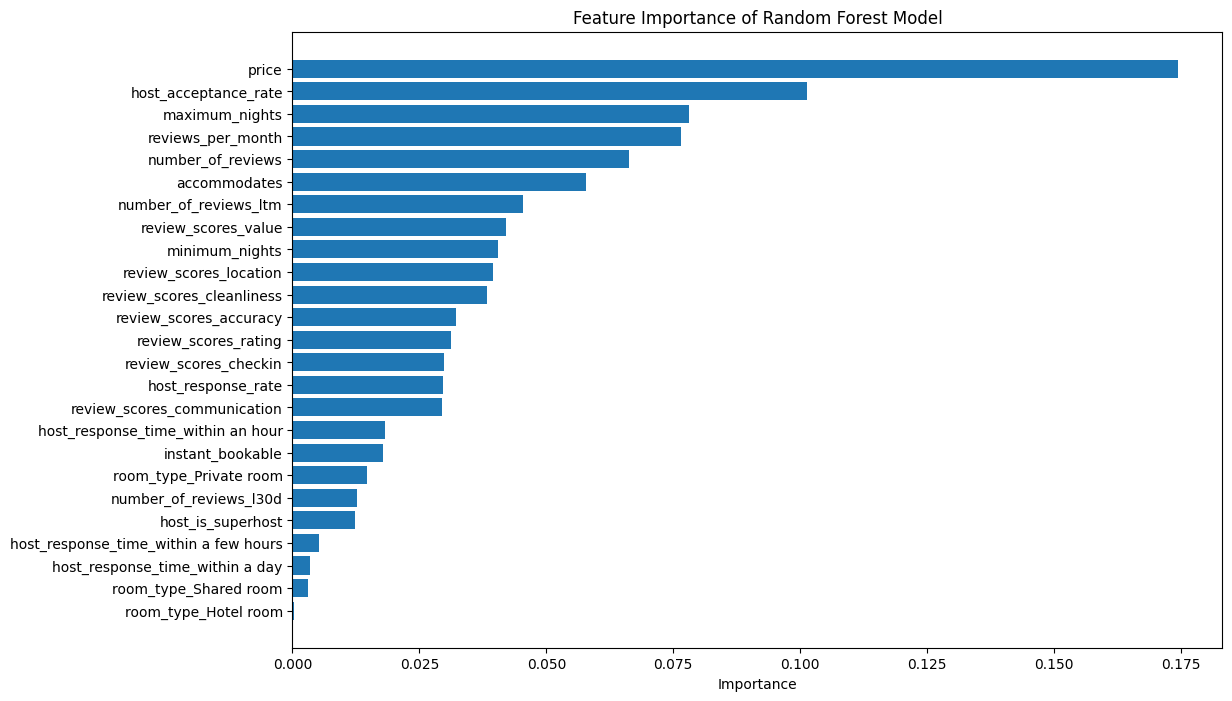

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(['booking_rate', 'availability_365', 'booked_days_365'], axis=1)
y = df['booking_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Calculate feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance of Random Forest Model')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


#### Hypertuning the Random Forest Model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 137}
Mean Squared Error (Random Forest): 0.07942994122304631
R^2 Score (Random Forest): 0.4237693257349241


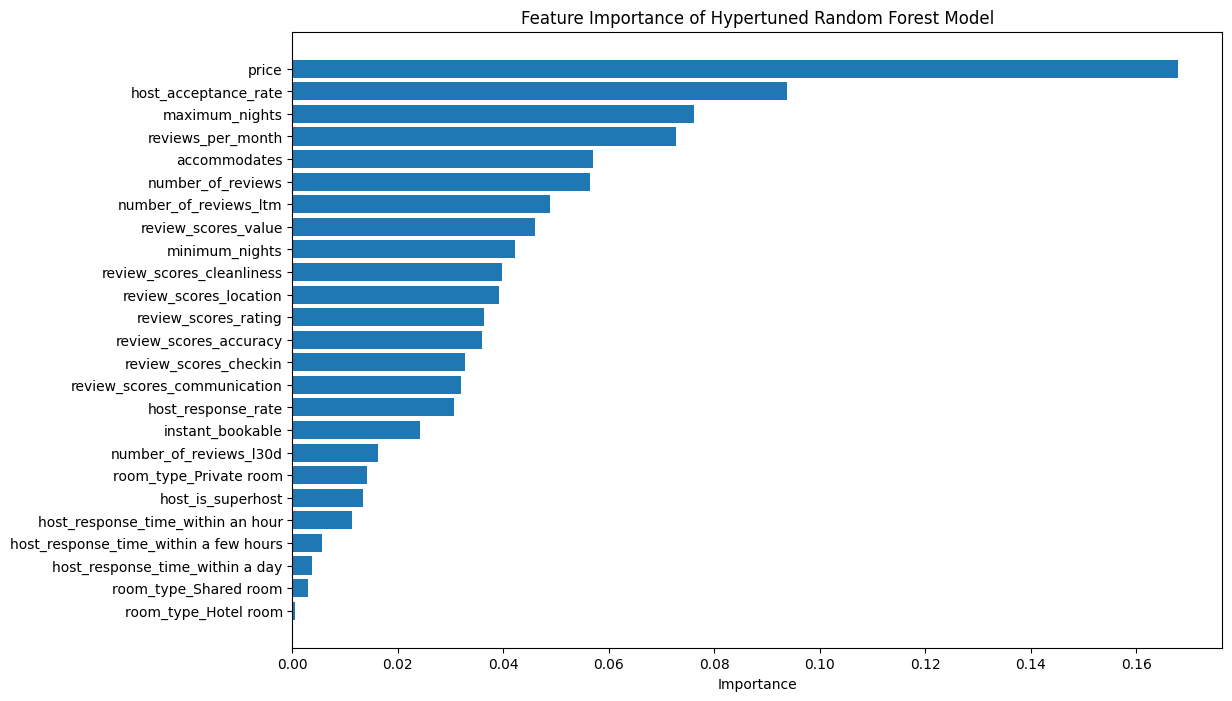

In [29]:

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Define features and target
X = df.drop(['booking_rate', 'availability_365', 'booked_days_365'], axis=1)
y = df['booking_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

# Train the Random Forest model with the best parameters
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Random Forest):", mse)
print("R^2 Score (Random Forest):", r2)

# Calculate feature importance
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance of Hypertuned Random Forest Model')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()



Result: After Hypertuning the Random Forest model's performance slightly dropped

#### XGBoost Regressor Model


---



Mean Squared Error (XGBoost): 0.11146918747390884
R^2 Score (XGBoost): 0.19133812679652373


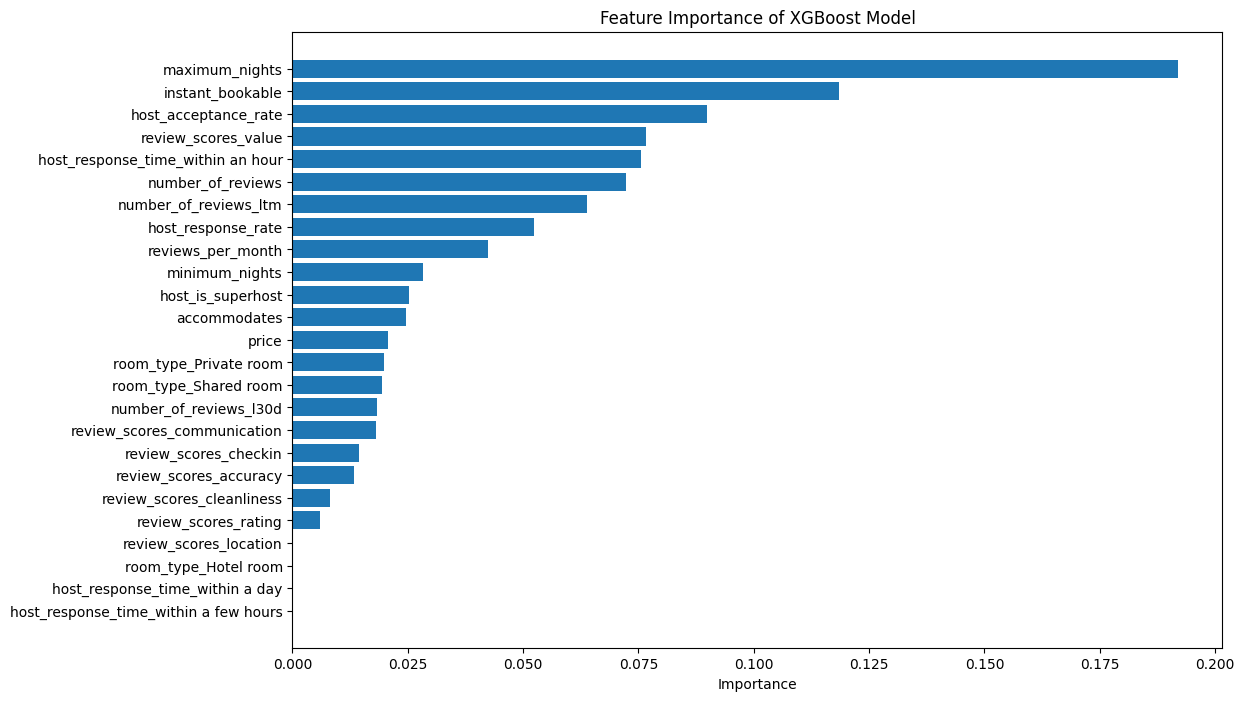

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Define features and target
X = df.drop(['booking_rate', 'booked_days_365', 'availability_365'], axis=1)
y = df['booking_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R^2 Score (XGBoost):", r2_xgb)

# Calculate feature importance
feature_importance_xgb = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_xgb
})

# Sort the DataFrame by importance
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance of XGBoost Model')
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


#### Hypertuning XGBoost Regressor Model


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error (XGBoost): 0.10504300858804198
R^2 Score (XGBoost): 0.23795734034916638


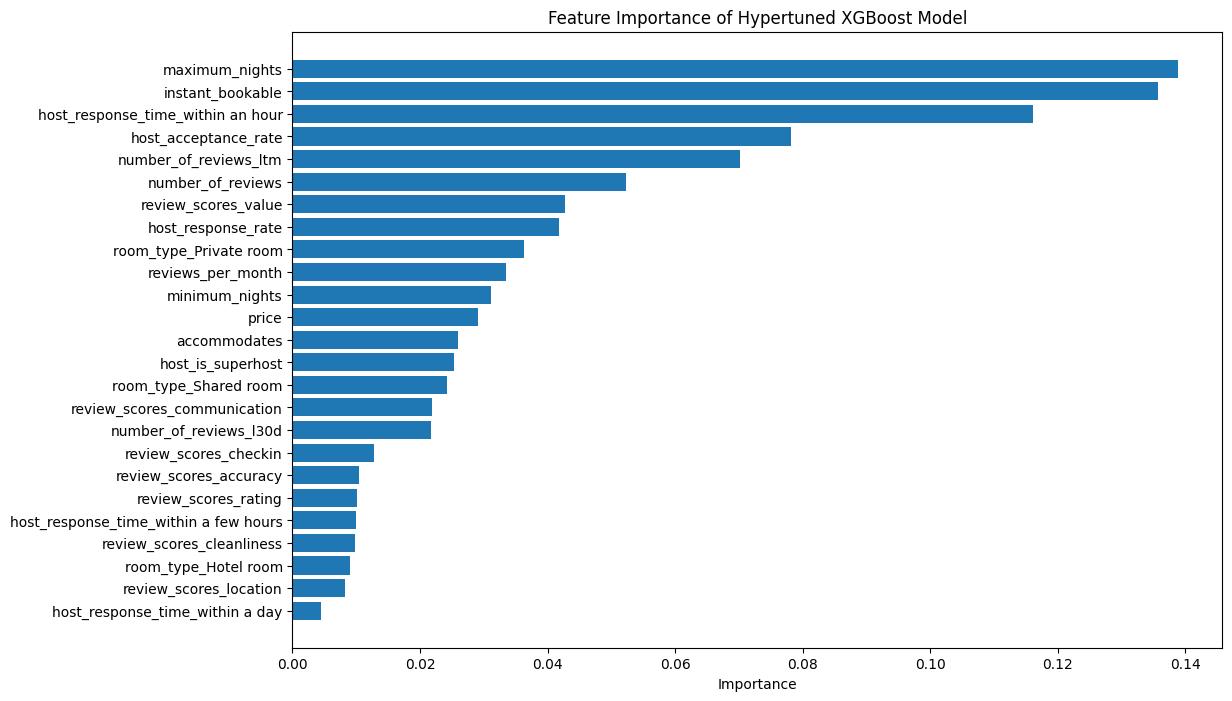

In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Train the XGBoost model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_xgb = best_xgb_model.predict(X_test)

# Print evaluation metrics
print("Mean Squared Error (XGBoost):", mean_squared_error(y_test, y_pred_xgb))
print("R^2 Score (XGBoost):", r2_score(y_test, y_pred_xgb))

# Plot feature importance
feature_importance_xgb = best_xgb_model.feature_importances_
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.title('Feature Importance of Hypertuned XGBoost Model')
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()
